**Problem Statement**: Airlines receive a vast amount of customer feedback through various channels, making it challenging to extract valuable insights and address issues effectively.

**Goal:** To develop a system that can automatically analyze customer feedback, identify key trends, sentiments, and areas for improvement, and provide actionable insights to enhance the overall customer experience.

**Objective:** By leveraging natural language processing and machine learning techniques, the system aims to extract structured information from unstructured customer reviews, categorize complaints, assess urgency and risk levels, and generate insights that can guide decision-making across different departments within the airline.

**Applicability:**

1. **Airlines industry:** Improve customer satisfaction, identify operational
issues, and optimize processes based on customer feedback.

2. **Hospitality and service industries:** Analyze customer reviews and feedback to enhance service quality and identify areas for improvement.

3. **E-commerce and retail:** Understand customer sentiment towards products, services, and overall shopping experience to optimize offerings and customer support.

4. **Government and public services:** Analyze citizen feedback to improve service delivery and address critical issues more effectively.

This modelling approach can be applied to any industry that collects and relies on customer feedback to improve their products, services, or operations.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import nltk
import re

In [ ]:
#pip install cohere

In [ ]:
#pip install llmx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/airlines_reviews.csv")


In [ ]:
df.head()

,review
0,The service was excellent. The cabin staff we...
1,We have had some torrid experiences with BA -...
2,We had a flight from ZRH to SFO via LHR. The l...
3,London to Paris. I wish that they would updat...
4,JFK to LHR. Empty check in and priority securi...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


In [ ]:
import pandas as pd
import re

# Remove punctuation and numbers, and convert to lowercase
df['cleaned_review'] = df['review'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower().str.strip()

# Display the cleaned reviews
#print(df['cleaned_review'])

In [ ]:
df.head()

,review,cleaned_review
0,The service was excellent. The cabin staff we...,the service was excellent the cabin staff were...
1,We have had some torrid experiences with BA -...,we have had some torrid experiences with ba w...
2,We had a flight from ZRH to SFO via LHR. The l...,we had a flight from zrh to sfo via lhr the le...
3,London to Paris. I wish that they would updat...,london to paris i wish that they would update ...
4,JFK to LHR. Empty check in and priority securi...,jfk to lhr empty check in and priority securit...


In [ ]:
# for plotting wordcloud we have to join the words into strings
all_words = ' '.join([text for text in df['cleaned_review']])

In [1]:
#all_words

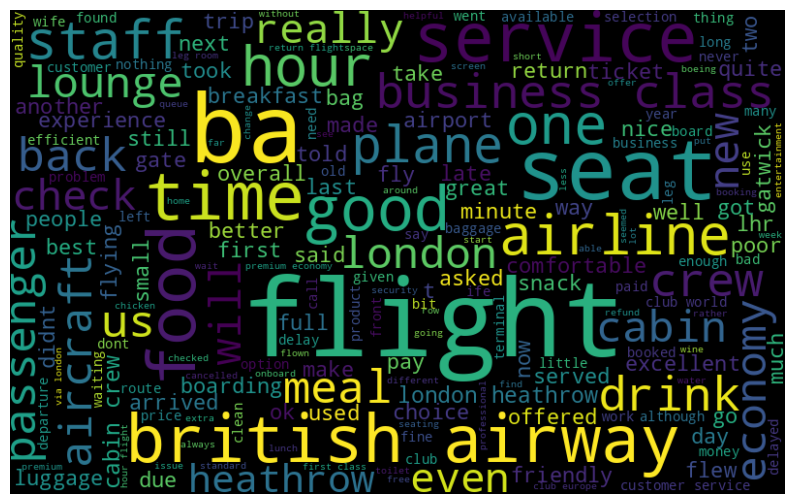

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#SENTIMENT ANALYSIS

In [ ]:
#pip install textblob

In [ ]:
#Text Blob
reviews=list(df['cleaned_review'])

from textblob import TextBlob

senti=[]
for i in range(0,len(reviews)):
    my_valence=TextBlob(reviews[i])
    senti.append(my_valence.sentiment[0])

In [ ]:
df["Sentiment Score"]= senti

In [ ]:
df.head()

,review,cleaned_review,Sentiment Score
0,The service was excellent. The cabin staff we...,the service was excellent the cabin staff were...,0.512045
1,We have had some torrid experiences with BA -...,we have had some torrid experiences with ba w...,0.318187
2,We had a flight from ZRH to SFO via LHR. The l...,we had a flight from zrh to sfo via lhr the le...,0.511028
3,London to Paris. I wish that they would updat...,london to paris i wish that they would update ...,0.153125
4,JFK to LHR. Empty check in and priority securi...,jfk to lhr empty check in and priority securit...,0.277462


In [ ]:
#Sentiment Scores

if 'Sentiment' not in df.columns:
    df['Sentiment'] = None  # or pd.NA if you want to use pandas' NA type


count_positive=0
count_neutral=0
count_negative=0

for i in range(0,len(reviews)):
    if df['Sentiment Score'][i]>=0:
        count_positive= count_positive+1
        df['Sentiment'][i] ='Positive'


    if df['Sentiment Score'][i]<0:
        count_negative= count_negative+1
        df['Sentiment'][i] ='Negative'


count_positive, count_negative

(364, 136)

In [ ]:
df.head()

,review,cleaned_review,Sentiment Score,Sentiment
0,The service was excellent. The cabin staff we...,the service was excellent the cabin staff were...,0.512045,Positive
1,We have had some torrid experiences with BA -...,we have had some torrid experiences with ba w...,0.318187,Positive
2,We had a flight from ZRH to SFO via LHR. The l...,we had a flight from zrh to sfo via lhr the le...,0.511028,Positive
3,London to Paris. I wish that they would updat...,london to paris i wish that they would update ...,0.153125,Positive
4,JFK to LHR. Empty check in and priority securi...,jfk to lhr empty check in and priority securit...,0.277462,Positive


In [ ]:
#Checking negative sentiments:

df[df['Sentiment']=='Negative']

,review,cleaned_review,Sentiment Score,Sentiment
5,I am writing to complain about my deeply dist...,i am writing to complain about my deeply distr...,-0.030780,Negative
8,British Airways business class is outclassed b...,british airways business class is outclassed b...,-0.178556,Negative
10,The seating configuration meant that we were ...,the seating configuration meant that we were p...,-0.160000,Negative
11,London to Mumbai. The electrics at my seat we...,london to mumbai the electrics at my seat were...,-0.081804,Negative
14,Flew London Heathrow to Kalamata. Slow boardi...,flew london heathrow to kalamata slow boarding...,-0.031926,Negative
...,...,...,...,...
485,"""This was the first time in a decade that I ha...",this was the first time in a decade that i hav...,-0.014815,Negative
489,Food was lousy. Who ever is planning the Asia...,food was lousy who ever is planning the asian ...,-0.104375,Negative
490,"""Heathrow Galleries lounge overcrowded and und...",heathrow galleries lounge overcrowded and unde...,-0.040820,Negative
491,On July 19th 2022 I had submitted a complaint...,on july th i had submitted a complaint form w...,-0.125000,Negative


In [ ]:
#pip install openai google-search-results

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
# Load the GloVe embeddings
embeddings_index = {}
with open('/content/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
# # Define a function to preprocess text
# def preprocess_text(text):
#     text = text.lower()
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     words = word_tokenize(text)
#     words = [word for word in words if word not in stopwords.words('english')]
#     lemmatizer = WordNetLemmatizer()
#     words = [lemmatizer.lemmatize(word) for word in words]
#     return words

In [ ]:
# Function to preprocess text
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english')]
    return tokens

In [ ]:
def document_vector(doc):
    doc = [word for word in doc if word in embeddings_index]
    if len(doc) == 0:
        return np.zeros(100)
    else:
        return np.mean([embeddings_index[word] for word in doc], axis=0)

In [ ]:
#!pip install nltk


In [ ]:
import nltk


In [ ]:
#nltk.download('all')


In [2]:
# from nltk.corpus import stopwords
# stopwords.words('english')

In [ ]:
# Create document vectors
df['vector'] = df['cleaned_review'].apply(lambda x: document_embedding(x))


In [ ]:
themes = {
    ' Meal Service': [
        'food', 'meal', 'service', 'quantity', 'quality', 'variety'
    ],
    'Airport Experience': [
        'staff', 'check-in', 'boarding', 'baggage', 'bus', 'aerobridge', 'security', 'lost', 'found', 'restricted', 'items', 'pilferage'
    ],

    'Flight Disruption': [
        'cancellation', 'delay', 'schedule', 'change', 'disruption'
    ],

    'Cabin Crew': [
        'staff', 'behavior', 'meal', 'service', 'announcement'
    ],

      'Aircraft Cabin Issues': [
        'seat', 'cleanliness', 'temperature', 'ambience' , 'comfortable' , 'Seats'
    ]
}

In [ ]:
# Create vectors for theme keywords
theme_vectors = {theme: document_vector(preprocess(' '.join(keywords))) for theme, keywords in themes.items()}

In [ ]:
# Preprocess reviews in df
df['processed_review'] = df['review'].apply(preprocess)

# Create vectors for reviews
df['review_vector'] = df['processed_review'].apply(document_vector)

In [ ]:
# Categorize reviews into themes based on cosine similarity
def assign_theme(review_vector):
    similarities = {theme: cosine_similarity([review_vector], [theme_vector]).flatten()[0] for theme, theme_vector in theme_vectors.items()}
    return max(similarities, key=similarities.get)

In [ ]:
df['assigned_theme'] = df['review_vector'].apply(assign_theme)

In [ ]:
print(df[['review', 'assigned_theme']])

                                                review      assigned_theme
0     The service was excellent. The cabin staff we...          Cabin Crew
1     We have had some torrid experiences with BA -...  Airport Experience
2    We had a flight from ZRH to SFO via LHR. The l...          Cabin Crew
3     London to Paris. I wish that they would updat...  Airport Experience
4    JFK to LHR. Empty check in and priority securi...  Airport Experience
..                                                 ...                 ...
495   London to New York JFK. We were booked on Bru...  Airport Experience
496   Manchester to Heathrow, similar to the flight...  Airport Experience
497  "Flew Zurich to London Heathrow. Very friendly...  Airport Experience
498  "Pisa to Chicago via London Heathrow. This rou...  Airport Experience
499  London Gatwick (LGW) to Lanzarote (ACE). We ha...  Airport Experience

[500 rows x 2 columns]


In [ ]:
df.head()

,review,cleaned_review,Sentiment Score,Sentiment,vector,processed_review,review_vector,assigned_theme
0,The service was excellent. The cabin staff we...,the service was excellent the cabin staff were...,0.512045,Positive,"[-0.3049625, 0.08490032, 0.34143996, -0.050082...","[service, excellent, cabin, staff, attentive, ...","[-0.3049625, 0.08490032, 0.34143996, -0.050082...",Cabin Crew
1,We have had some torrid experiences with BA -...,we have had some torrid experiences with ba w...,0.318187,Positive,"[-0.08518223, 0.12717356, 0.3040762, -0.076024...","[torrid, experience, ba, shy, report, flew, ye...","[-0.083025604, 0.12214749, 0.27416977, -0.0650...",Airport Experience
2,We had a flight from ZRH to SFO via LHR. The l...,we had a flight from zrh to sfo via lhr the le...,0.511028,Positive,"[-0.1812161, 0.062960595, 0.30356246, -0.06856...","[flight, zrh, sfo, via, lhr, leg, zrh, lhr, re...","[-0.17569135, 0.07455557, 0.31244972, -0.06857...",Cabin Crew
3,London to Paris. I wish that they would updat...,london to paris i wish that they would update ...,0.153125,Positive,"[-0.065127715, 0.32160032, 0.33190104, -0.1047...","[london, paris, wish, would, update, aircraft,...","[-0.065127715, 0.32160032, 0.33190104, -0.1047...",Airport Experience
4,JFK to LHR. Empty check in and priority securi...,jfk to lhr empty check in and priority securit...,0.277462,Positive,"[-0.054697216, 0.21278882, 0.23564601, -0.1238...","[jfk, lhr, empty, check, priority, security, q...","[-0.054697216, 0.21278882, 0.23564601, -0.1238...",Airport Experience


In [ ]:
# Assuming df is your DataFrame
df.to_excel('reviews_themes.xlsx', index=False)


**Using Semantic Search**

In [ ]:
#!pip install txtai sentence-transformers


In [ ]:
%%capture

from txtai.embeddings import Embeddings

# Create embeddings model, backed by sentence-transformers & transformers
embeddings = Embeddings({"path": "BAAI/bge-small-en-v1.5", "content": True})

In [ ]:
data_v1 = list(df.cleaned_review)

In [ ]:
# Create embeddings index with content enabled. The default behavior is to only store indexed vectors.
%%time
# Create an index for the list of text
embeddings.index([(uid, text, None) for uid, text in enumerate(data_v1)])

CPU times: user 2min 1s, sys: 29.3 s, total: 2min 30s
Wall time: 3min 11s


In [ ]:
query = 'food'

uid = embeddings.similarity(query, data_v1)[0:10]

In [ ]:
query = 'food'

uid = embeddings.similarity(query, data_v1)[0:5]

for id in uid:
  print(f"{data_v1[id[0]]}")

fantastic flight down to heathrow crew doing their best to keep everyone happy in challenging times nice to see they have introduced a free snack and water its a start
atl to lhr boeing  economy ive just returned from a family holiday in the usa and flew ba economy the flight was slightly delayed but most of this delay was made up during the journey staff were pleasant and the ife was fine however the food was terrible main meal was a choice of chicken curry and rice or a veggie pasta breakfast before landing was a cold box consisting of a croissant bag of cranberries and a granola bar what has happened to the  meat choices veggies choose veggie option in advance and a cooked breakfast ba have a british flag on the tail but do not serve any british food im a silver executive club member and food on ba has been deteriorating over the last couple of years ive made several complaints
the last trip was in nov to washington flew first in the new a which is a great aircraft very spacious cab

In [ ]:
df_negative = df[df['Sentiment'] == 'Negative']

In [ ]:
df_negative.head()

,review,cleaned_review,Sentiment Score,Sentiment,vector,processed_review,review_vector,assigned_theme
5,I am writing to complain about my deeply dist...,i am writing to complain about my deeply distr...,-0.030780,Negative,"[-0.067316815, -0.021821583, 0.30383503, -0.14...","[writing, complain, deeply, distressing, briti...","[-0.06861023, -0.019254167, 0.30320394, -0.143...",Airport Experience
8,British Airways business class is outclassed b...,british airways business class is outclassed b...,-0.178556,Negative,"[-0.0949882, 0.31718528, 0.2038331, -0.0613248...","[british, airway, business, class, outclassed,...","[-0.092204385, 0.31906816, 0.2016975, -0.06470...",Airport Experience
10,The seating configuration meant that we were ...,the seating configuration meant that we were p...,-0.160000,Negative,"[-0.26744935, 0.2688656, 0.40508205, -0.123488...","[seating, configuration, meant, packed, like, ...","[-0.22731006, 0.27547944, 0.36599964, -0.11606...",Airport Experience
11,London to Mumbai. The electrics at my seat we...,london to mumbai the electrics at my seat were...,-0.081804,Negative,"[-0.11716853, -0.01435968, 0.28417102, -0.0918...","[london, mumbai, electric, seat, working, may,...","[-0.116328746, -0.012216257, 0.28280672, -0.09...",Airport Experience
14,Flew London Heathrow to Kalamata. Slow boardi...,flew london heathrow to kalamata slow boarding...,-0.031926,Negative,"[-0.10681731, 0.060110502, 0.24803665, 0.03512...","[flew, london, heathrow, kalamata, slow, board...","[-0.10903404, 0.065528385, 0.24418168, 0.03846...",Airport Experience


In [ ]:
# Counting the different themes
theme_counts = df_negative['assigned_theme'].value_counts()

# Displaying the counts
print(theme_counts)

Airport Experience    125
Cabin Crew              8
 Meal Service           3
Name: assigned_theme, dtype: int64


In [ ]:
# Defining Risks and their Priority

priority_levels = {
    "Priority Level 1": [
        "Terrorism",
        "Bomb threat",
        "Hijacking",
        "Security breach",
        "Severe accident",
        "Fire emergency",
        "Structural failure",
        "Compliance violation",
        "Serious legal non-compliance",
        "data breach",
        "System failure"
    ],
    "Priority Level 2": [
        "Long delays",
        "Mass cancellations",
        "Health crisis (e.g., outbreak, pandemic)",
        "Serious baggage issues ",
        "Widespread loss or Theft",
        "Technical malfunction",
        "Significant power outage",
        "Critical unsanitary condition",
        "Overcrowding leading to safety concerns"
    ],
    "Priority Level 3": [
        "Frequent delays",
        "Recurring cancellations",
        "Staff misconduct",
        "Discriminatory behavior",
        "Customer service failures",
        "Minor legal issues",
        "Regular baggage delays",
        "Frequent operational inefficiencies",
        "Persistent restroom problems",
        "Partial system outages"
    ],
    "Priority Level 4": [
        "Noise pollution",
        "Air quality issues",
        "Environmental concerns",
        "Regular maintenance issues",
        "Limited facility availability",
        "Pricing disputes",
        "Cleanliness issues",
        " Wi-Fi connectivity problems",
        "Staff shortage"
    ],
    "Priority Level 5": [
        "Lost and found queries",
        "Language assistance requests",
        "Feedback on amenities",
        "Suggestions for improvement",
        "Minor child care concerns",
        "Pet travel feedback",
        "Minor noise complaints",
        "Online or app issues",
        "General IT queries"
    ]
}


In [ ]:
# Create vectors for theme keywords
priority_vectors = {priority_levels: document_vector(preprocess(' '.join(keywords))) for priority_levels, keywords in priority_levels.items()}

In [ ]:
# Categorize reviews into themes based on cosine similarity
def assign_theme(review_vector):
    similarities = {theme: cosine_similarity([review_vector], [priority_vectors]).flatten()[0] for theme, priority_vectors in priority_vectors.items()}
    return max(similarities, key=similarities.get)


In [ ]:
df_negative['assigned_risk'] = df_negative['review_vector'].apply(assign_theme)

In [ ]:
df_negative.head()

,review,cleaned_review,Sentiment Score,Sentiment,vector,processed_review,review_vector,assigned_theme,assigned_risk
5,I am writing to complain about my deeply dist...,i am writing to complain about my deeply distr...,-0.030780,Negative,"[-0.067316815, -0.021821583, 0.30383503, -0.14...","[writing, complain, deeply, distressing, briti...","[-0.06861023, -0.019254167, 0.30320394, -0.143...",Airport Experience,Priority Level 5
8,British Airways business class is outclassed b...,british airways business class is outclassed b...,-0.178556,Negative,"[-0.0949882, 0.31718528, 0.2038331, -0.0613248...","[british, airway, business, class, outclassed,...","[-0.092204385, 0.31906816, 0.2016975, -0.06470...",Airport Experience,Priority Level 4
10,The seating configuration meant that we were ...,the seating configuration meant that we were p...,-0.160000,Negative,"[-0.26744935, 0.2688656, 0.40508205, -0.123488...","[seating, configuration, meant, packed, like, ...","[-0.22731006, 0.27547944, 0.36599964, -0.11606...",Airport Experience,Priority Level 5
11,London to Mumbai. The electrics at my seat we...,london to mumbai the electrics at my seat were...,-0.081804,Negative,"[-0.11716853, -0.01435968, 0.28417102, -0.0918...","[london, mumbai, electric, seat, working, may,...","[-0.116328746, -0.012216257, 0.28280672, -0.09...",Airport Experience,Priority Level 5
14,Flew London Heathrow to Kalamata. Slow boardi...,flew london heathrow to kalamata slow boarding...,-0.031926,Negative,"[-0.10681731, 0.060110502, 0.24803665, 0.03512...","[flew, london, heathrow, kalamata, slow, board...","[-0.10903404, 0.065528385, 0.24418168, 0.03846...",Airport Experience,Priority Level 4


In [ ]:
priority_df = df_negative[df_negative['assigned_risk'] == 'Priority Level 3']


In [ ]:
priority_df.head()

,review,cleaned_review,Sentiment Score,Sentiment,vector,processed_review,review_vector,assigned_theme,assigned_risk
39,"Dubrovnik to Gatwick. Poor ground service, ch...",dubrovnik to gatwick poor ground service chaot...,-0.011806,Negative,"[-0.122426145, 0.0010877515, 0.12399707, -0.05...","[dubrovnik, gatwick, poor, ground, service, ch...","[-0.122426145, 0.0010877515, 0.12399707, -0.05...",Airport Experience,Priority Level 3
294,London to Nashville. The worst airline Trans-...,london to nashville the worst airline transatl...,-0.329408,Negative,"[0.004980139, 0.044155747, 0.27497432, -0.0256...","[london, nashville, worst, airline, transatlan...","[0.004980139, 0.044155747, 0.27497432, -0.0256...",Airport Experience,Priority Level 3
350,British Airways cancelled my flight and put m...,british airways cancelled my flight and put me...,-0.100000,Negative,"[0.037520442, -0.06433631, 0.2250091, 0.028791...","[british, airway, cancelled, flight, put, eva,...","[0.04057201, -0.055495877, 0.21462308, 0.02343...",Airport Experience,Priority Level 3
383,"Glasgow to Heathrow. BA are a disgrace, it on...",glasgow to heathrow ba are a disgrace it once ...,-0.036000,Negative,"[0.08758178, -0.04755533, 0.26410076, -0.05285...","[glasgow, heathrow, ba, disgrace, stood, high,...","[0.07509832, -0.030189916, 0.26104444, -0.0475...",Airport Experience,Priority Level 3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


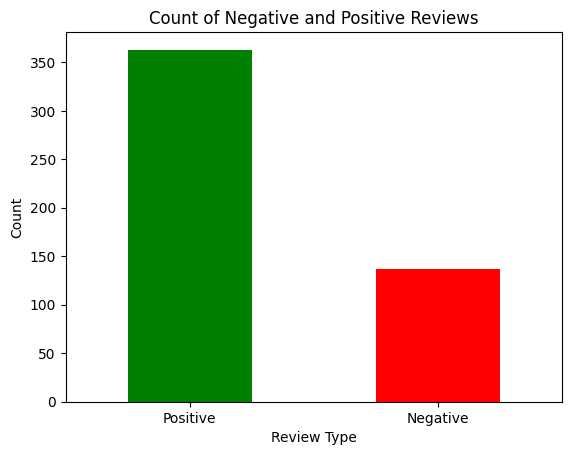

In [ ]:
#Counting number of negative and positive sentiments
# Classify reviews as negative (< 0) or positive (> 0)
df['review_type'] = df['Sentiment Score'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Count the reviews
review_counts = df['review_type'].value_counts()

# Plotting
review_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.title('Count of Negative and Positive Reviews')
plt.xticks(rotation=0)  # Rotates the x-axis labels for better readability
plt.show()

# Reviews of Negative Sentiments needs to be addressed.

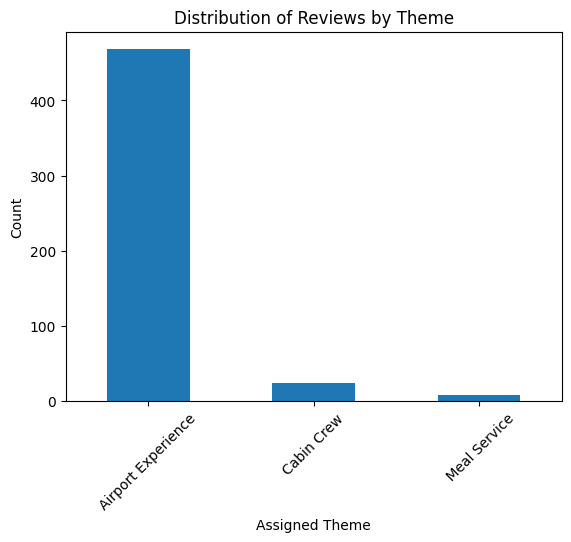

In [ ]:
# Count the frequency of each theme
theme_counts = df['assigned_theme'].value_counts()

# Plotting
theme_counts.plot(kind='bar')
plt.xlabel('Assigned Theme')
plt.ylabel('Count')
plt.title('Distribution of Reviews by Theme')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.show()


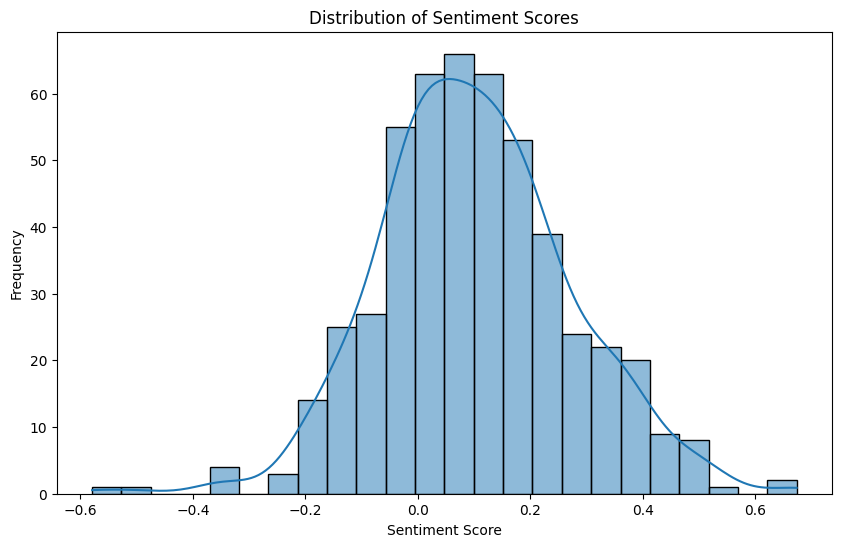

In [ ]:
# Plotting the distribution of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment Score'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

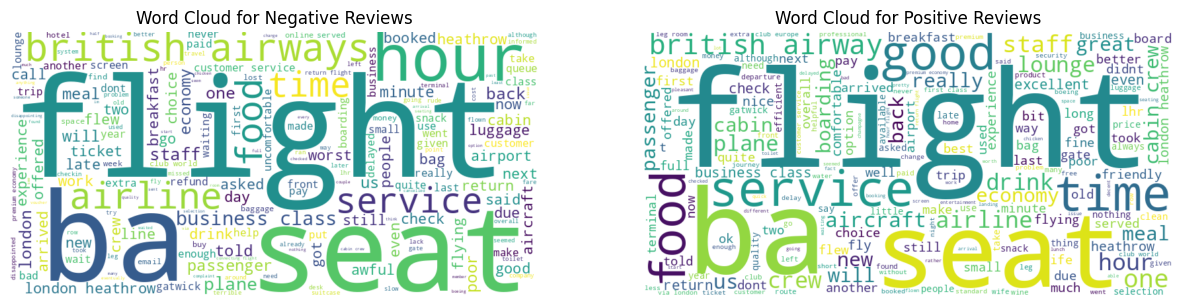

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


negative_reviews = df[df['Sentiment Score'] < 0]['cleaned_review'].str.cat(sep=' ')
positive_reviews = df[df['Sentiment Score'] > 0]['cleaned_review'].str.cat(sep=' ')

# Generate word clouds
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plotting
plt.figure(figsize=(15, 7))

# Negative Reviews Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

# Positive Reviews Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.show()


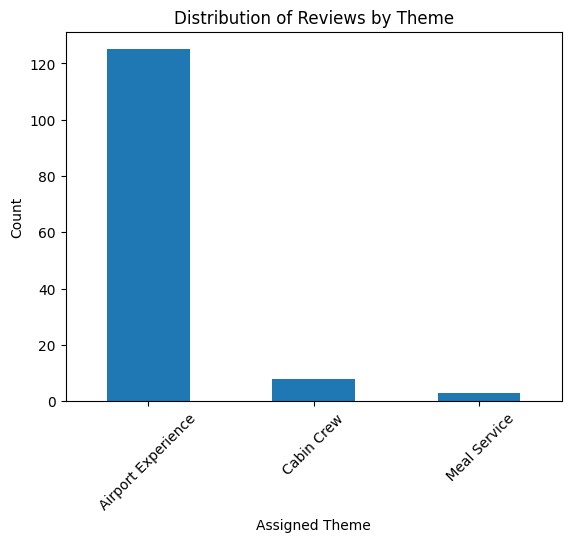

In [ ]:
# Theme count of negative reviews

# Count the frequency of each theme
theme_counts = df_negative['assigned_theme'].value_counts()

# Plotting
theme_counts.plot(kind='bar')
plt.xlabel('Assigned Theme')
plt.ylabel('Count')
plt.title('Distribution of Reviews by Theme')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.show()

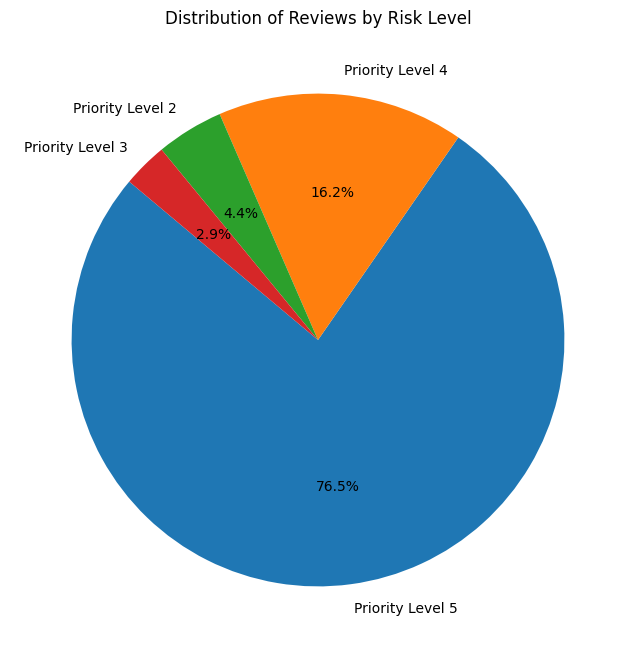

In [ ]:
# Count the frequency of each risk level
risk_level_counts = df_negative['assigned_risk'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(risk_level_counts, labels=risk_level_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Reviews by Risk Level')

# To create a donut chart, uncomment the following line
# plt.Circle((0, 0), 0.7, color='white')

plt.show()

#Priority Level 2 and 3 needs to be addressed at level 1 and others at level 2